<a href="https://colab.research.google.com/github/majoGel/GProjects/blob/main/ReportTerna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA LOADING**

In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt

In [2]:
# Specifica il percorso del file Excel
#file_path = '/content/drive/My Drive/Progetti/2018_W6_GME.xlsx'
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2018_W6_GME.xlsx'
# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

df = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
df = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(df.head())


In [3]:
#Import WoW dataset
# Specifica il percorso del file Excel
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2018_W5_GME.xlsx'

# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

WoWdf = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
WoWdf = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(WoWdf.head())

In [4]:
#Import YoY dataset
# Specifica il percorso del file Excel
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/2017_W6_GME.xlsx'

# Leggi il primo foglio (sheet) del file Excel
def read_excel_sheet(sheet_index):
  if 0 <= sheet_index <= 6:
        df = pd.read_excel(file_path, sheet_name=sheet_index)
        return df
  else:
        raise ValueError("L'indice del foglio deve essere compreso tra 0 e 6.")

YoYdf = pd.DataFrame()
dfs = []
for i in range(7):  # Da 0 a 6
    df_iter = read_excel_sheet(i)
    df_iter['DAY'] = f"DAY{i + 1}"
    dfs.append(df_iter)
YoYdf = pd.concat(dfs, ignore_index=True)
# Mostra le prime righe del DataFrame
#print(YoYdf.head())

In [5]:
#Import manual ENTSOE classification
# Specifica il percorso del file Excel
file_path = 'https://raw.githubusercontent.com/majoGel/GProjects/main/Data/anagrafica_updated%201.xlsx'

df_classification = pd.read_excel(file_path, sheet_name=0)
df_classification = df_classification.rename(columns={"CODICE_ETSO":"UNIT_REFERENCE_NO"})
#print(df_classification.head())

#**DATA PREPARATION**

In [7]:
df['INTERVAL_NO_Key']=  df['DAY'].astype(str) +"_"+ df['INTERVAL_NO'].astype(str)
WoWdf['INTERVAL_NO_Key']=  WoWdf['DAY'].astype(str) +"_"+ WoWdf['INTERVAL_NO'].astype(str)
YoYdf['INTERVAL_NO_Key']=  YoYdf['DAY'].astype(str) +"_"+ YoYdf['INTERVAL_NO'].astype(str)
df['UP_UC'] = df['UNIT_REFERENCE_NO'].str[:2]
WoWdf['UP_UC'] = WoWdf['UNIT_REFERENCE_NO'].str[:2]
YoYdf['UP_UC'] = YoYdf['UNIT_REFERENCE_NO'].str[:2]
timedf = df.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
timedf = timedf[['DAY', 'INTERVAL_NO','INTERVAL_NO_Key']]
print(timedf)

#Filtro Italia
zone_values = ['CNOR', 'NORD', 'CSUD', 'SUD', 'SARD', 'SICI']
df = df[df['ZONE_CD'].isin(zone_values)]
WoWdf = WoWdf[WoWdf['ZONE_CD'].isin(zone_values)]
YoYdf = YoYdf[YoYdf['ZONE_CD'].isin(zone_values)]

         DAY  INTERVAL_NO INTERVAL_NO_Key
0       DAY1            1          DAY1_1
1       DAY1            2          DAY1_2
2       DAY1            3          DAY1_3
3       DAY1            4          DAY1_4
4       DAY1            5          DAY1_5
...      ...          ...             ...
479365  DAY7           20         DAY7_20
479367  DAY7           21         DAY7_21
479369  DAY7           22         DAY7_22
479371  DAY7           23         DAY7_23
479373  DAY7           24         DAY7_24

[168 rows x 3 columns]


In [8]:
#df_Off_Ac
df_Off_Ac = df[(df['STATUS_CD'] == 'ACC') & (df['PURPOSE_CD'] == 'OFF')]
df_Off_Ac = df_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#df_Off_Ac_B
df_Off_Ac_B = df_Off_Ac[(df_Off_Ac['BILATERAL_IN'] == True)]
#df_Off_Ac_FB
df_Off_Ac_FB = df_Off_Ac[(df_Off_Ac['BILATERAL_IN'] == False )]
#df_PUN
df_PUN = df_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
df_PUN = df_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
df_PUN = df_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})

#df_BID
df_BID = df[(df['STATUS_CD'] == 'ACC') & (df['PURPOSE_CD'] == 'BID') ]
check_df_bid= df_BID['INTERVAL_NO_Key'].value_counts(dropna=False)
print(check_df_bid)
df_plot = df_Off_Ac.groupby('INTERVAL_NO_Key', as_index=False)['AWARDED_QUANTITY_NO'].sum()
df_plot_B = df_Off_Ac_B.groupby('INTERVAL_NO_Key', as_index=False)['AWARDED_QUANTITY_NO'].sum()
df_plot_FB = df_Off_Ac_FB.groupby('INTERVAL_NO_Key', as_index=False)['AWARDED_QUANTITY_NO'].sum()

df_plot_B = df_plot_B.rename(columns={'AWARDED_QUANTITY_NO': 'BORSA'})
df_plot_FB = df_plot_FB.rename(columns={'AWARDED_QUANTITY_NO': 'FUORI BORSA'})
df_plot = pd.merge(df_plot, df_plot_B, on='INTERVAL_NO_Key', how='left')
df_plot = pd.merge(df_plot, df_plot_FB, on='INTERVAL_NO_Key', how='left')
df_plot = pd.merge(df_plot, df_PUN, on='INTERVAL_NO_Key', how='left')
df_Interval = df.drop_duplicates(subset=['INTERVAL_NO',"DAY"], keep='first')
df_Interval = df_Interval[["INTERVAL_NO_Key","INTERVAL_NO"]]
df_plot = pd.merge(df_plot, df_Interval, on='INTERVAL_NO_Key', how='left')
df_plot = df_plot.sort_values(by=['DAY','INTERVAL_NO'], ascending=True)

#KPI per tabella PUN
KPI_AvgPUN = df_PUN['PUN'].mean()
KPI_Liquid= round(df_plot_B["BORSA"].sum()/(df_Off_Ac["AWARDED_QUANTITY_NO"].sum() )*100,2)
KPI_Demand = round(df_BID["AWARDED_QUANTITY_NO"].sum()/1e9,2)
KPI_MGPcost = round(KPI_AvgPUN*KPI_Demand/100,2)

print(KPI_AvgPUN)
print(KPI_Demand)
print(KPI_Liquid)
print(KPI_MGPcost)


INTERVAL_NO_Key
DAY1_8     753
DAY4_8     749
DAY6_16    749
DAY4_17    749
DAY1_18    749
          ... 
DAY5_13    711
DAY7_23    711
DAY7_24    708
DAY5_14    707
DAY7_13    706
Name: count, Length: 168, dtype: int64
4979.916666666667
5.92
33.56
294.81


In [9]:
#WoWdf Data preparation
#WoWdf_Off_Ac
WoWdf_Off_Ac = WoWdf[(WoWdf['STATUS_CD'] == 'ACC') & (WoWdf['PURPOSE_CD'] == 'OFF') ]
WoWdf_Off_Ac = WoWdf_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#WoWdf_PUN
WoWdf_PUN = WoWdf_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
WoWdf_PUN = WoWdf_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
WoWdf_PUN = WoWdf_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})

#WoWdf_BID
WoWdf_BID = WoWdf[(WoWdf['STATUS_CD'] == 'ACC') & (WoWdf['PURPOSE_CD'] == 'BID')]

#WoWdf_liquid Totale qta borsa/totale volumi acc
WoWdf_Off_Ac_B = WoWdf_Off_Ac[(WoWdf_Off_Ac['BILATERAL_IN'] == True)]
WoWdf_plot_B = WoWdf_Off_Ac_B.groupby('INTERVAL_NO_Key', as_index=False)['AWARDED_QUANTITY_NO'].sum()
WoWdf_plot_B = WoWdf_plot_B.rename(columns={'AWARDED_QUANTITY_NO': 'BORSA'})

#KPI per tabella PUN
WoWKPI_AvgPUN = WoWdf_PUN['PUN'].mean()
WoWKPI_Demand = WoWdf_BID["AWARDED_QUANTITY_NO"].sum()/1e9
WoWKPI_MGPcost = WoWKPI_AvgPUN*WoWKPI_Demand/100
WoWKPI_Liquid= round(WoWdf_plot_B["BORSA"].sum()/(WoWdf_Off_Ac["AWARDED_QUANTITY_NO"].sum() )*100,2)

WoWDelta_AvgPUN = round(((KPI_AvgPUN -WoWKPI_AvgPUN)/WoWKPI_AvgPUN)*100,0)
WoWDelta_Demand = round(((KPI_Demand -WoWKPI_Demand)/WoWKPI_Demand)*100,0)
WoWDelta_Liquid = round(((KPI_Liquid -WoWKPI_Liquid)/WoWKPI_Liquid)*100,0)
WoWDelta_MGPcost = round(((KPI_MGPcost -WoWKPI_MGPcost)/WoWKPI_MGPcost)*100,0)

print(WoWDelta_AvgPUN)
print(WoWDelta_Demand)
print(WoWDelta_Liquid)
print(WoWKPI_Liquid,KPI_Liquid)
print(WoWDelta_MGPcost)

3.0
1.0
16.0
28.99 33.56
4.0


In [10]:
#YoYdf Data preparation
#YoYdf_Off_Ac
YoYdf_Off_Ac = YoYdf[(YoYdf['STATUS_CD'] == 'ACC') & (YoYdf['PURPOSE_CD'] == 'OFF')]
YoYdf_Off_Ac = YoYdf_Off_Ac.sort_values(by='INTERVAL_NO_Key', ascending=False)

#YoYdf_PUN
YoYdf_PUN = YoYdf_Off_Ac.drop_duplicates(subset='INTERVAL_NO_Key', keep='first')
YoYdf_PUN = YoYdf_PUN[['INTERVAL_NO_Key', 'AWARDED_PRICE_NO', 'DAY']]
YoYdf_PUN = YoYdf_PUN.rename(columns={'AWARDED_PRICE_NO': 'PUN'})

#YoYdf_BID
YoYdf_BID = YoYdf[(YoYdf['STATUS_CD'] == 'ACC') & (YoYdf['PURPOSE_CD'] == 'BID')]

start_date = '2018-01-28'
end_date = '2018-02-03'
#YoYdf_liquid
YoYdf_Off_Ac_B = YoYdf_Off_Ac[(YoYdf_Off_Ac['BILATERAL_IN'] == True)]
YoYdf_plot_B = YoYdf_Off_Ac_B.groupby('INTERVAL_NO_Key', as_index=False)['AWARDED_QUANTITY_NO'].sum()
YoYdf_plot_B = YoYdf_plot_B.rename(columns={'AWARDED_QUANTITY_NO': 'BORSA'})

#KPI per tabella PUN
YoYKPI_AvgPUN = YoYdf_PUN['PUN'].mean()
YoYKPI_Demand = round(YoYdf_BID["AWARDED_QUANTITY_NO"].sum()/1e9,2)
YoYKPI_MGPcost = round(YoYKPI_AvgPUN*YoYKPI_Demand/100,2)
YoYKPI_Liquid= round(YoYdf_plot_B["BORSA"].sum()/(YoYdf_Off_Ac["AWARDED_QUANTITY_NO"].sum() )*100,2)

YoYDelta_AvgPUN = round(((KPI_AvgPUN -YoYKPI_AvgPUN)/YoYKPI_AvgPUN)*100,0)
YoYDelta_Demand = round(((KPI_Demand -YoYKPI_Demand)/YoYKPI_Demand)*100,0)
YoYDelta_Liquid = round(((KPI_Liquid -YoYKPI_Liquid)/YoYKPI_Liquid)*100,0)
YoYDelta_MGPcost = round(((KPI_MGPcost -YoYKPI_MGPcost)/YoYKPI_MGPcost)*100,0)


#print(YoYdf_PUN.head)
print(YoYDelta_AvgPUN)
print(YoYDelta_Demand)
print(YoYDelta_Liquid,YoYKPI_Liquid)
print(YoYDelta_MGPcost)

-16.0
3.0
4.0 32.38
-14.0


In [13]:
#df_class
df_class = pd.merge(df, df_classification, on='UNIT_REFERENCE_NO', how='left')
df_class['CLASSIFICAZIONE TERNA'] = df_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')

#print(df_class.head())

#df_class_off
df_class_off = df_class[(df_class['STATUS_CD'] == 'ACC') & (df_class['PURPOSE_CD'] == 'OFF')]
check_class_off = df_class_off['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())
#df_class_bid
df_class_bid = df_class[(df_class['STATUS_CD'] == 'ACC') & (df_class['PURPOSE_CD'] == 'BID')]
check_class_bid = df_class_bid['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
print(df_class_bid['AWARDED_QUANTITY_NO'].sum())
print(df_class_off['AWARDED_QUANTITY_NO'].sum())
print(check_class_bid)
#print(df_class_bid.count)

#NaN Up
#NaNUplist = df_class_off[(df_class_off['CLASSIFICAZIONE TERNA'].isna())]
#NaNUplist = NaNUplist.drop_duplicates(subset='UNIT_REFERENCE_NO', keep='first')
#print(NaNUplist['UNIT_REFERENCE_NO'])
#NaNUplist.to_excel('df_class_off_nan.xlsx', index=False)
#from google.colab import files
#files.download('df_class_off_nan.xlsx')

#KPI per tabella Offerta

plot_class_off = df_class_off.groupby(['DAY','INTERVAL_NO_Key', 'CLASSIFICAZIONE TERNA'], as_index=False)['AWARDED_QUANTITY_NO'].sum()
plot_class_off = plot_class_off.sort_values(by=['DAY','INTERVAL_NO_Key'], ascending=True)
plot_class_off = pd.merge(plot_class_off,timedf[['INTERVAL_NO','INTERVAL_NO_Key']],how="left",on="INTERVAL_NO_Key")

KPI_class_off = df_class_off.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
KPI_class_off['%'] = (KPI_class_off['AWARDED_QUANTITY_NO']/KPI_class_off['AWARDED_QUANTITY_NO'].sum())*100
KPITot_p_off = round(KPI_class_off['%'].sum(),2)
KPI_class_off['%'] = round(KPI_class_off['%'] ,2)
KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] = (KPI_class_off['AWARDED_QUANTITY_NO']/1e9)
KPITot_qt_off = round(KPI_class_off['AWARDED_QUANTITY_NO[TWh]'].sum(),2)
KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] = round(KPI_class_off['AWARDED_QUANTITY_NO[TWh]'] ,2)

#KPI per tabella Domanda
plot_class_bid = df_class_bid.groupby(['DAY','INTERVAL_NO','INTERVAL_NO_Key', 'CLASSIFICAZIONE TERNA'], as_index=False)['AWARDED_QUANTITY_NO'].sum()
plot_class_bid = plot_class_bid.sort_values(by=['DAY','INTERVAL_NO','INTERVAL_NO_Key'], ascending=True)

KPI_class_bid = df_class_bid.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
KPI_class_bid['%'] = (KPI_class_bid['AWARDED_QUANTITY_NO']/KPI_class_bid['AWARDED_QUANTITY_NO'].sum())*100
KPITot_p_bid = round(KPI_class_bid['%'].sum(),2)
KPI_class_bid['%'] = round(KPI_class_bid['%'] ,2)
KPI_class_bid['AWARDED_QUANTITY_NO[TWh]'] = (KPI_class_bid['AWARDED_QUANTITY_NO']/1e9)
KPITot_qt_bid = round(KPI_class_bid['AWARDED_QUANTITY_NO[TWh]'].sum(),2)
KPI_class_bid['AWARDED_QUANTITY_NO[TWh]'] = round(KPI_class_bid['AWARDED_QUANTITY_NO[TWh]'] ,2)
print(KPITot_qt_off,KPITot_p_off,KPITot_qt_bid,KPITot_p_bid)

#print(plot_class_bid)


5915228650
4177150314
CLASSIFICAZIONE TERNA
Non Classificati    122244
Idrico pompaggio       179
Name: count, dtype: int64
4.18 100.0 5.92 100.0


In [14]:
#YoYdf_class
YoYdf_class = pd.merge(YoYdf, df_classification, on='UNIT_REFERENCE_NO', how='left')
YoYdf_class['CLASSIFICAZIONE TERNA'] = YoYdf_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')

#print(df_class.head())

#YoYdf_class_off
YoYdf_class_off = YoYdf_class[(YoYdf_class['STATUS_CD'] == 'ACC') & (YoYdf_class['PURPOSE_CD'] == 'OFF')]
check_class_off = YoYdf_class_off['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())
#df_class_bid
YoYdf_class_bid = YoYdf_class[(df_class['STATUS_CD'] == 'ACC') & (YoYdf_class['PURPOSE_CD'] == 'BID')]
check_class_bid = YoYdf_class_bid['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_bid)
#print(df_class_bid.count)

#KPI per tabella Offerta
YoYKPI_class_off = YoYdf_class_off.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
YoYKPI_class_off=YoYKPI_class_off.rename(columns={'AWARDED_QUANTITY_NO':'YoYAWARDED_QUANTITY_NO'})
YoYKPI_class_off = pd.merge(YoYKPI_class_off, KPI_class_off, on='CLASSIFICAZIONE TERNA', how='left')
YoYKPI_class_off['YoY'] = ((YoYKPI_class_off['AWARDED_QUANTITY_NO'] - YoYKPI_class_off['YoYAWARDED_QUANTITY_NO'])/YoYKPI_class_off['YoYAWARDED_QUANTITY_NO'].sum())*100
YoYAvg_class_off = YoYKPI_class_off['YoY'].mean()
YoYKPI_class_off['YoY'] = round(YoYKPI_class_off['YoY'] ,2)
#KPI per tabella Domanda
YoYKPI_class_bid = YoYdf_class_bid.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
YoYKPI_class_bid=YoYKPI_class_bid.rename(columns={'AWARDED_QUANTITY_NO':'YoYAWARDED_QUANTITY_NO'})
YoYKPI_class_bid = pd.merge(YoYKPI_class_bid, KPI_class_bid, on='CLASSIFICAZIONE TERNA', how='left')
YoYKPI_class_bid['YoY'] = ((YoYKPI_class_bid['AWARDED_QUANTITY_NO'] - YoYKPI_class_bid['YoYAWARDED_QUANTITY_NO'])/YoYKPI_class_bid['YoYAWARDED_QUANTITY_NO'].sum())*100
YoYAvg_class_bid = YoYKPI_class_bid['YoY'].mean()
YoYKPI_class_bid['YoY'] = round(YoYKPI_class_bid['YoY'] ,2)
#print(YoYKPI_class_bid)

In [16]:
#WoWdf_class
WoWdf_class = pd.merge(WoWdf, df_classification, on='UNIT_REFERENCE_NO', how='left')
WoWdf_class['CLASSIFICAZIONE TERNA'] = WoWdf_class['CLASSIFICAZIONE TERNA'].fillna('Non Classificati')
#print(df_class.head())

#df_class_off
WoWdf_class_off = WoWdf_class[(WoWdf_class['STATUS_CD'] == 'ACC') & (WoWdf_class['PURPOSE_CD'] == 'OFF')]
check_class_off = WoWdf_class_off['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_off)
#print(df_class_off.head())
#df_class_bid
WoWdf_class_bid = WoWdf_class[(WoWdf_class['STATUS_CD'] == 'ACC') & (WoWdf_class['PURPOSE_CD'] == 'BID')]
check_class_bid = WoWdf_class_bid['CLASSIFICAZIONE TERNA'].value_counts(dropna=False)
#print(check_class_bid)
#print(df_class_bid.count)

#KPI per tabella Offerta
WoWKPI_class_off = WoWdf_class_off.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
WoWKPI_class_off = WoWKPI_class_off.rename(columns={'AWARDED_QUANTITY_NO':'wowAWARDED_QUANTITY_NO'})
WoWKPI_class_off = pd.merge(WoWKPI_class_off, KPI_class_off, on='CLASSIFICAZIONE TERNA', how='left')
WoWKPI_class_off['wow'] = ((WoWKPI_class_off['AWARDED_QUANTITY_NO'] - WoWKPI_class_off['wowAWARDED_QUANTITY_NO'])/WoWKPI_class_off['wowAWARDED_QUANTITY_NO'].sum())*100
WoWAvg_class_off = WoWKPI_class_off['wow'].mean()
WoWKPI_class_off['wow'] = round(WoWKPI_class_off['wow'] ,2)

#KPI per tabella Domanda
WoWKPI_class_bid = WoWdf_class_bid.groupby(['CLASSIFICAZIONE TERNA'], as_index=False,dropna=False)['AWARDED_QUANTITY_NO'].sum()
WoWKPI_class_bid=WoWKPI_class_bid.rename(columns={'AWARDED_QUANTITY_NO':'wowAWARDED_QUANTITY_NO'})
WoWKPI_class_bid = pd.merge(WoWKPI_class_bid, KPI_class_bid, on='CLASSIFICAZIONE TERNA', how='left')
WoWKPI_class_bid['wow'] = ((WoWKPI_class_bid['AWARDED_QUANTITY_NO'] - WoWKPI_class_bid['wowAWARDED_QUANTITY_NO'])/WoWKPI_class_bid['wowAWARDED_QUANTITY_NO'].sum())*100
WoWAvg_class_bid = WoWKPI_class_bid['wow'].mean()
WoWKPI_class_bid['wow'] = round(WoWKPI_class_bid['wow'] ,2)

#print(WoWKPI_class_bid)

# **REPORT PUN, OFFERTA , DOMANDA**

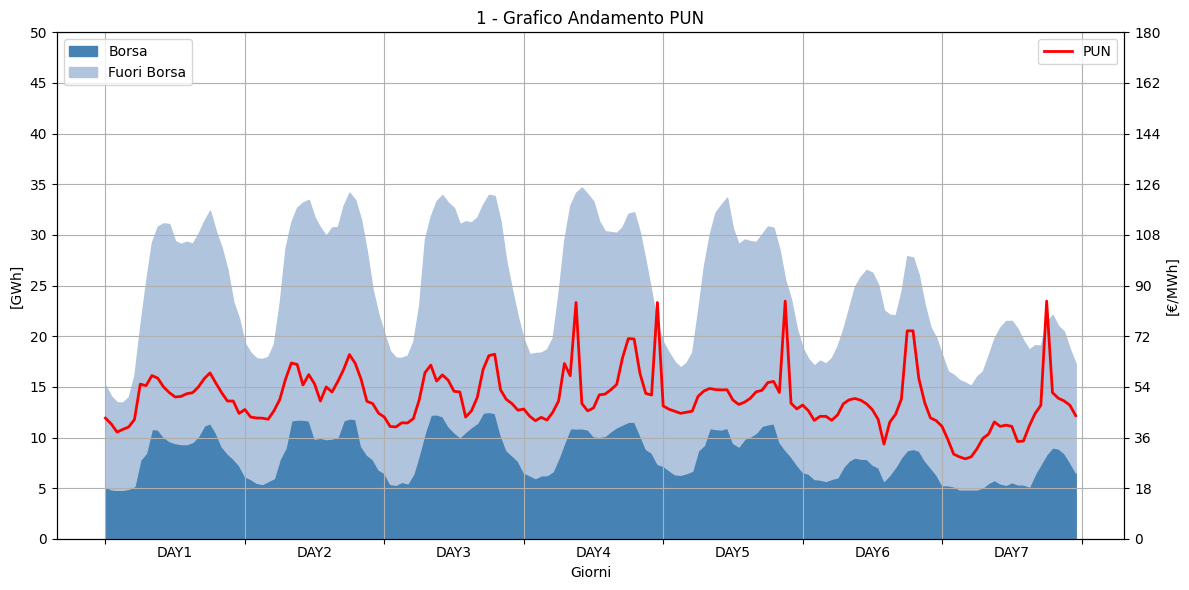

In [17]:
import matplotlib.ticker as ticker

# Dati e impostazioni
hours = 24 * 7
x_labels = ["DAY1", "DAY2", "DAY3", "DAY4", "DAY5", "DAY6", "DAY7"]

# Convertiamo le serie in GWh dividendo per 1 milione
borsa = df_plot['BORSA'] / 1000000
fuori_borsa = df_plot['FUORI BORSA'] / 1000000
pun_series_week = df_plot['PUN'] / 100  # Serie PUN già espressa in €/MWh

# Creare il grafico con righe di riferimento allineate sugli assi y e x
fig, ax1 = plt.subplots(figsize=(12, 6))

# Area per "Borsa" (impilata sotto)
ax1.fill_between(range(hours), 0, borsa.values, color='#4682B4', label='Borsa')  # Colore blu

# Area per "Fuori Borsa" (impilata sopra Borsa)
ax1.fill_between(range(hours), borsa.values, borsa.values + fuori_borsa.values, color='#B0C4DE', label='Fuori Borsa')  # Colore azzurro chiaro

# Linea per "PUN" (secondo asse y)
ax2 = ax1.twinx()  # Secondo asse y per il PUN
ax2.plot(range(hours), pun_series_week.values, color='red', label='PUN', linewidth=2)

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[GWh]')
ax2.set_ylabel('[€/MWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 50  # Massimo per asse y sinistro
max_euro = 180  # Massimo per asse y destro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax2.set_ylim(0, max_euro)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))
ax2.set_yticks(np.linspace(0, max_euro, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere le legende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Allineare le griglie degli assi y e x
ax1.grid(True)
ax2.grid(False)  # Disattivare la griglia dell'asse y destro
ax1.tick_params(axis='x', which='minor', bottom=False)

plt.title('1 - Grafico Andamento PUN')
plt.tight_layout()
plt.show()

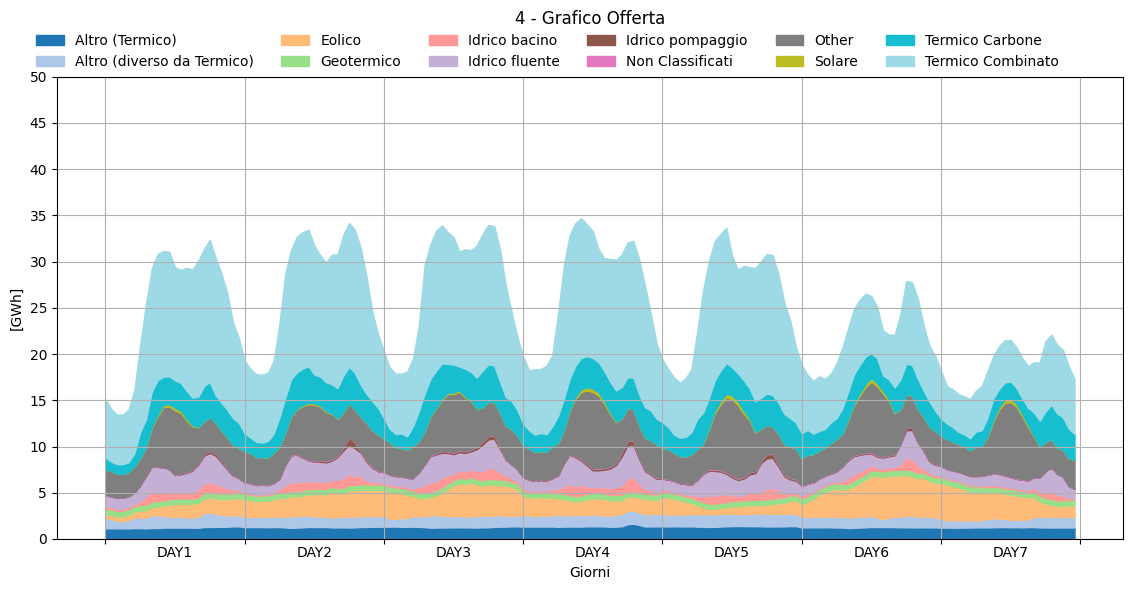

In [18]:
# PLOT OFFERTA -- Grafico impilato
hours = 24 * 7
x_labels = ["DAY1", "DAY2", "DAY3", "DAY4", "DAY5", "DAY6", "DAY7"]

# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in GWh
df_pivot = plot_class_off.pivot(index=['DAY','INTERVAL_NO','INTERVAL_NO_Key'], columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico
# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di CLASSIFICAZIONE TERNA
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le aree per ogni classificazione di terna con impilamento
bottom_area = np.zeros(hours)
for i, classification in enumerate(df_pivot.columns):
    series_values = df_pivot[classification].values / 1000000  # Dividere per 1 milione per avere i GWh
    ax1.fill_between(range(hours), bottom_area, bottom_area + series_values, label=classification, color=colors[i])
    bottom_area += series_values  # Aggiorna l'area inferiore per la prossima serie

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[GWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 50  # Massimo per asse y sinistro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper center', bbox_to_anchor=(0.46, 1.12), ncol=6, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)
# Nascondere i tick minor usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# Aggiunta del titolo e layout
plt.title('4 - Grafico Offerta', pad=38)
plt.tight_layout()
plt.show()


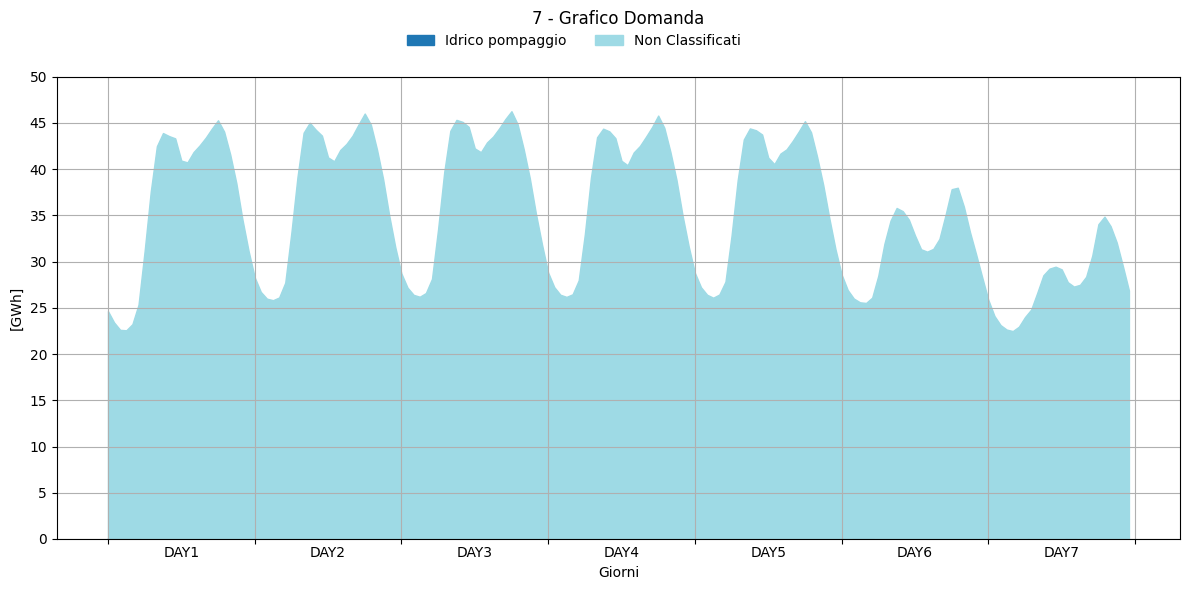

In [19]:
# PLOT DOMANDA -- Grafico impilato
hours = 24 * 7
x_labels = ["DAY1", "DAY2", "DAY3", "DAY4", "DAY5", "DAY6", "DAY7"]

# Creazione della tabella pivot per classificazione TERNA e assegnazione dei valori in GWh
df_pivot = plot_class_bid.pivot(index=['DAY','INTERVAL_NO','INTERVAL_NO_Key'], columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
#df_pivot = plot_class_bid.pivot(index='INTERVAL_NO_Key', columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO')
df_pivot = df_pivot.fillna(0)  # Riempire i NaN con 0 per evitare errori nel grafico

# Prepariamo il grafico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crea un array di colori per ciascuna serie di CLASSIFICAZIONE TERNA
colors = plt.cm.tab20(np.linspace(0, 1, len(df_pivot.columns)))

# Traccia le aree per ogni classificazione di terna con impilamento
bottom_area = np.zeros(hours)
for i, classification in enumerate(df_pivot.columns):
    series_values = df_pivot[classification].values / 1000000  # Dividere per 1 milione per avere i GWh
    ax1.fill_between(range(hours), bottom_area, bottom_area + series_values, label=classification, color=colors[i])
    bottom_area += series_values  # Aggiorna l'area inferiore per la prossima serie

# Configurazione degli assi con valori allineati
ax1.set_xlabel('Giorni')
ax1.set_ylabel('[GWh]')

# Sincronizzare i limiti degli assi y impostando gli stessi limiti e ticks
max_gwh = 50  # Massimo per asse y sinistro
num_divisions = 10  # Numero di righe di riferimento

ax1.set_ylim(0, max_gwh)
ax1.set_yticks(np.linspace(0, max_gwh, num_divisions + 1))

# Configurare le etichette dell'asse x con righe di riferimento allineate a ore 0 e etichette centrate
ax1.set_xticks([i * 24 for i in range(8)])  # Righe di riferimento all'ora 0 per ogni giorno
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(24))  # Tick minori a ogni 24 ore per centrare le label

# Impostare le label solo sui tick minori
ax1.set_xticklabels([])
ax1.set_xticks([12 + i * 24 for i in range(7)], minor=True)  # Tick minori per posizionare le label centrali
ax1.set_xticklabels(x_labels, minor=True)

# Allineare le label centrali
for label in ax1.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')

# Aggiungere la legenda in alto, disattivando il bordo
ax1.legend(loc='upper center', bbox_to_anchor=(0.46, 1.12), ncol=6, frameon=False)

# Allineare le griglie degli assi y e x
ax1.grid(True)
# Nascondere i tick minor usati per posizionare le label
ax1.tick_params(axis='x', which='minor', bottom=False)

# Aggiunta del titolo e layout
plt.title('7 - Grafico Domanda', pad=38)
plt.tight_layout()
plt.show()


In [20]:
# Tabella Andamento PUN
data = {
    'Metrics': ['PUN[€/MWh]', 'Domanda[TWh]', 'Liquidità','Costo MGP[M€]'],
    'Valore': [round(KPI_AvgPUN/100,2),KPI_Demand ,KPI_Liquid,KPI_MGPcost ],
    'WoW': [WoWDelta_AvgPUN,WoWDelta_Demand,WoWDelta_Liquid,WoWDelta_MGPcost],
    'YoY': [YoYDelta_AvgPUN,YoYDelta_Demand,YoYDelta_Liquid,YoYDelta_MGPcost]
}

# Crea il DataFrame
TAB_Pun = pd.DataFrame(data)
def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
# Mostra la tabella formattata
styleTAB_Pun = style_columns(TAB_Pun)
styleTAB_Pun

Metrics,Valore,WoW,YoY
PUN[€/MWh],49.80,3.00,-16.00
Domanda[TWh],5.92,1.00,3.00
Liquidità,33.56,16.00,4.00
Costo MGP[M€],294.81,4.00,-14.00


In [21]:
#Tabbella Andamento OFFERTA
#data = {
 #   'Offerta': ['TWh'],
  #  KPI_class_off['CLASSIFICAZIONE TERNA']:KPI_class_off['AWARDED_QUANTITY_NO']
#}
pivot_table = KPI_class_off.pivot_table(index=None,columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO[TWh]')
pivot_table.insert(0, 'OFFERTA', 'TWh')
new_row = {'OFFERTA': '%'}
indcol = 0
for col in KPI_class_off['CLASSIFICAZIONE TERNA']:
    new_row[col] = KPI_class_off['%'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)

new_row = {'OFFERTA': 'wow'}
indcol = 0
for col in WoWKPI_class_off['CLASSIFICAZIONE TERNA']:
    new_row[col] = WoWKPI_class_off['wow'].iloc[indcol]
    indcol = indcol + 1
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)

new_row = {'OFFERTA': 'yoy'}
indcol = 0
for col in YoYKPI_class_off['CLASSIFICAZIONE TERNA']:
    new_row[col] = YoYKPI_class_off['YoY'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)


# Crea il DataFrame
TAB_class_off = pd.DataFrame(pivot_table)
TAB_class_off['Totale'] = [KPITot_qt_off,KPITot_p_off,WoWAvg_class_off,YoYAvg_class_off]
#print(TAB_class_off)

def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
# Mostra la tabella formattata
styleTAB_class_off = style_columns(TAB_class_off)
styleTAB_class_off

OFFERTA,Altro (Termico),Altro (diverso da Termico),Eolico,Geotermico,Idrico bacino,Idrico fluente,Idrico pompaggio,Non Classificati,Other,Solare,Termico Carbone,Termico Combinato,Totale
TWh,0.22,0.20,0.37,0.10,0.09,0.31,0.02,0.01,0.72,0.01,0.47,1.67,4.18
%,5.19,4.70,8.74,2.39,2.19,7.44,0.39,0.21,17.16,0.32,11.22,40.06,100.00
wow,0.78,0.25,-1.70,-0.03,0.16,0.56,0.15,0.01,0.55,0.04,2.24,1.06,0.34
yoy,0.78,0.30,1.95,-0.02,-0.37,0.49,-0.02,-3.44,1.91,0.09,-3.85,-0.05,-0.19


In [22]:
#Tabbella Andamento DOMANDA
pivot_table = KPI_class_bid.pivot_table(index=None,columns='CLASSIFICAZIONE TERNA', values='AWARDED_QUANTITY_NO[TWh]')
pivot_table.insert(0, 'DOMANDA', 'TWh')
new_row = {'DOMANDA': '%'}
indcol = 0
for col in KPI_class_bid['CLASSIFICAZIONE TERNA']:
    new_row[col] = KPI_class_bid['%'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)

new_row = {'DOMANDA': 'wow'}
indcol = 0
for col in WoWKPI_class_bid['CLASSIFICAZIONE TERNA']:
    new_row[col] = WoWKPI_class_bid['wow'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)

new_row = {'DOMANDA': 'yoy'}
indcol = 0
for col in YoYKPI_class_bid['CLASSIFICAZIONE TERNA']:
    new_row[col] = YoYKPI_class_bid['YoY'].iloc[indcol]
    indcol = indcol + 1

#print(new_row)
# Aggiungi la nuova riga al DataFrame
new_row_df = pd.DataFrame([new_row])

pivot_table = pd.concat([pivot_table, new_row_df], ignore_index=True)


# Crea il DataFrame
TAB_class_bid = pd.DataFrame(pivot_table)
TAB_class_bid['Totale'] = [KPITot_qt_bid,KPITot_p_bid,WoWAvg_class_bid,YoYAvg_class_bid]
#print(TAB_class_off)
def style_columns(df):
    # Usa il metodo `style` di Pandas per formattare la tabella e arrotondare i numeri
    styled_df = df.style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#2a66c7'), ('color', 'white'), ('font-weight', 'bold')]}]
    ).hide(axis="index")

    # Arrotonda le celle a 2 decimali nella visualizzazione
    styled_df = styled_df.format(precision=2)

    return styled_df
# Mostra la tabella formattata
styleTAB_class_bid = style_columns(TAB_class_bid)
styleTAB_class_bid

DOMANDA,Idrico pompaggio,Non Classificati,Totale
TWh,0.01,5.91,5.92
%,0.08,99.92,100.00
wow,0.00,0.86,0.43
yoy,0.11,38.09,19.10
